# DataCamp Practical Exam

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Loading the file
df = pd.read_csv('product_sales.csv')

# Data Validation

In [3]:
# Week column - Ensuring that values are numeric and within the expected range (All Good)
df['week'].value_counts() # All values lie within the range


# sales_method column
# converting all the values to lowercase
df['sales_method'] = df['sales_method'].str.lower()

# Changing the values of 'em + call' to 'email + call' to ensure consistent data
df.loc[df['sales_method'] == 'em + call', 'sales_method'] = 'email + call'
df['sales_method'].value_counts()


# customer_id column
df['customer_id'].isna().sum() # 0
df['customer_id'].is_unique # True


# nb_sold column
df['nb_sold'].dtype
df['nb_sold'].value_counts() # No null or negative values


# revenue column
df['revenue'].isna().sum() # 1074 rows are null
df[df['revenue'].isna()]['nb_sold'].value_counts()
df[df['revenue'].isnull()].groupby('sales_method').size()
df[df['revenue'].isnull()].groupby('week').size()
# Dropping the null values since it is a small fraction of the data and to prevent introducing artificial averages
df = df[df['revenue'].notnull()]

# years_as_customer
df['years_as_customer'].value_counts()
# impute the data with the highest possible value which is 41
today = datetime.today()
current_year = today.year
start_year = 1984
difference = current_year - start_year

df.loc[df['years_as_customer'] > 41, 'years_as_customer'] = difference


# nb_site_visits column
df['nb_site_visits'].value_counts() # No negative integers

# state
df['state'].unique() # No issues
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


# Exploratory Data Analysis

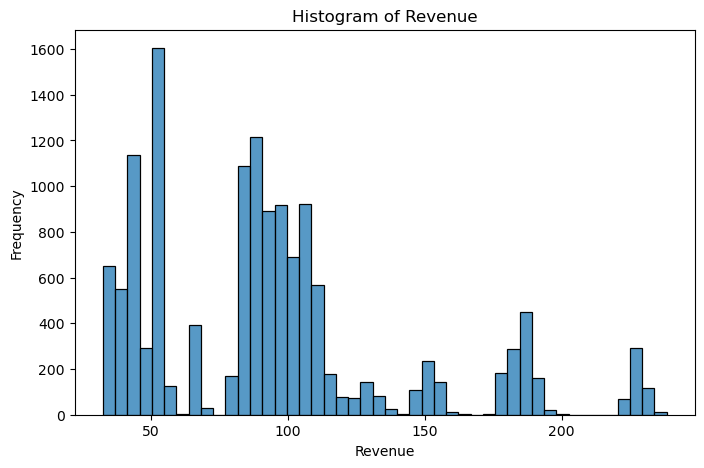

In [4]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(x='revenue', data=df)
plt.title('Histogram of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

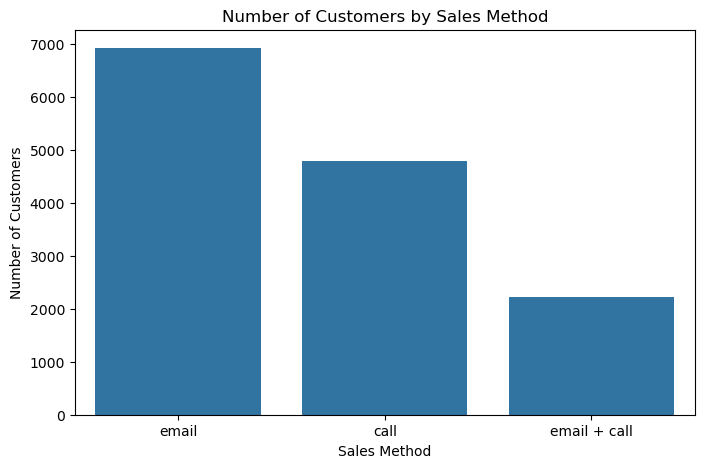

In [7]:
# Bar Chart
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sales_method', order=df['sales_method'].value_counts().index)
plt.title('Number of Customers by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.show()

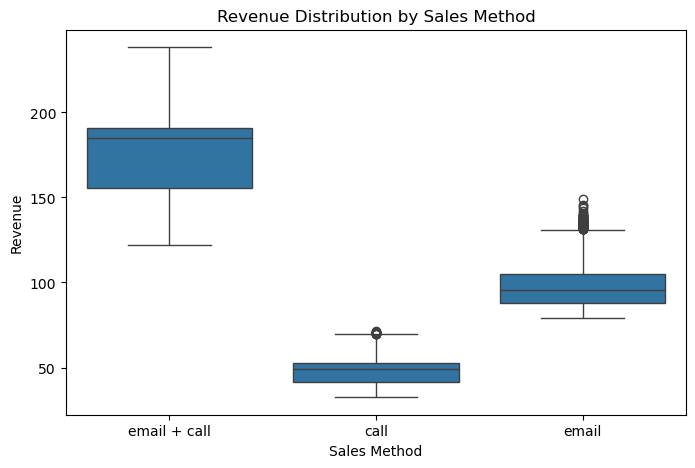

In [5]:
# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sales_method', y='revenue')
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

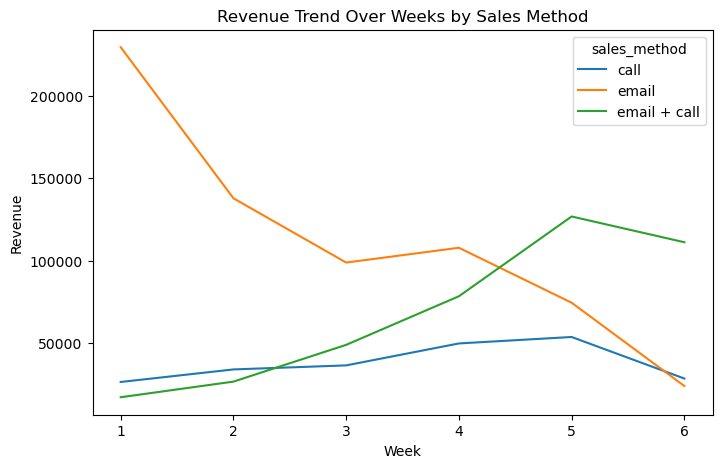

In [8]:
# Line Chart
weekly_revenue = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=weekly_revenue, x='week', y='revenue', hue='sales_method')
plt.title('Revenue Trend Over Weeks by Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.show()

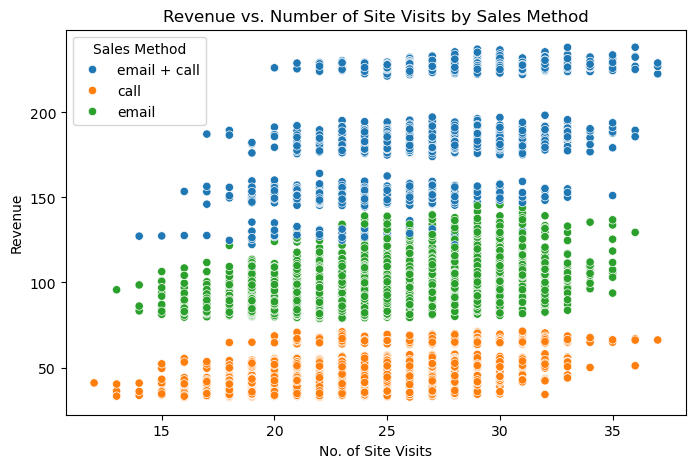

In [6]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='nb_site_visits', y='revenue', hue='sales_method')
plt.title('Revenue vs. Number of Site Visits by Sales Method')
plt.xlabel('No. of Site Visits')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')
plt.show()

# Sales Rep Questions

In [9]:
# No of Customers per Method
email_call = len(df[df['sales_method'] == 'email + call']) # 2223
email = len(df[df['sales_method'] == 'email']) # 6922
call = len(df[df['sales_method'] == 'call']) # 4781

# Business Metrics

In [10]:
# Calculating Average Revenue per Customer by Method
average_revenue = df.groupby('sales_method')['revenue'].mean().round(2).reset_index()
average_revenue.columns = ['Sales Method', 'Average Revenue per Customer']
average_revenue

,Sales Method,Average Revenue per Customer
0,call,47.60
1,email,97.13
2,email + call,183.65


In [11]:
df.to_csv(r'E:\Data Analysis\\Practical Exam\\product_sales_clean.csv', index=False)